<a href="https://colab.research.google.com/github/vcu-swim-lab/digital-forensics-data-science-tutorials/blob/main/Image_Analysis_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:saddlebrown;"><center>Image Analysis: Analyzing A Set of Shoe Prints For Digital Forensics Using Data Science</center></h1>


<br>
<h2 style="color:peru;"><center><u>[Background Information]</u></center></h2>

<p><center>Digital Forensics is a science that focuses on identifying, gathering, processing, analysing, and 
reporting of data stored electronically. <blockquote style="color:burlywood;">Computer emails, text messages, images, documents, and internet histories 
are all viable for digital forensic analysis.</blockquote>
 
An analyst will have to examine data from a user or suspect and try and preserve the 
evidence in its most original form. <blockquote style="color:burlywood;">Any alarming piece of information from these computer files can be used 
as evidence. </blockquote>

Usually, the unfiltered data will be received in bulk with a lot harmless filler, resulting in a tasking file size. As a result, to comb the data manually would be grueling and time consuming. This is where the utilization of data science and machine learning comes into play. Chat logs are a great example of this, and one of the most common evidence formats you will come across. <blockquote style="color:burlywood;"> You may have to read through 
their messages to see their conversation, who their communicating with, potential partners, or other key 
pieces of evidence. Chat logs can be a key piece to the criminal profile puzzle.</blockquote> </center></p>

<h2 style="color:darkolivegreen;"><center><u>[Accessing the Image Datasets]</u></center></h2>

<p><center>The image dataset we will be looking at is a series of outsole prints given to us by Iowa State University: <a href="https://iastate.figshare.com/articles/figure/2D_Footwear_outsole_impressions/11624073/1">[Link]</a> </center></p>
<blockquote style="color:darkkhaki";>More details on this dataset can be found on the site. Some of those details being; a readme file, and a csv file with background and suspect information on the prints.</blockquote>

<p><center>In our case, we will be using these outsole prints as example data to showcase time saving image processing techniques. These techniques will allow us to; clean and condense large datasets of images to a more manageable size, categorize them by certain attributes and features, and minimize the scope for manual analysis.</center></p>

<p><center>We hope by learning and applying these methods that digital forensic investigator's and future ones like YOU will be able to complete their tasks in a fast and efficent manner.</center></p> in like our modern day and age to find the culprit responsible given a vast amount of evidence like "images".

<h4 style="color:darkolivegreen;"><center><u>Why is this important?</u></center></h4>

<p><center>Digital Forensics is a very important branch in forensic science. It's everywhere in your favorite crime scene shows, like that one character working in the lab that is trying to analyze from  thousand tracks of fingerprints, footprints, thumbprints in a case.</center></p>

<p><center>The lab analyst could have multiple images piling on in a case, there could be hundreds or thousands of images to pull through and sort. So we can use the secrets of data science to process our images.</center></p>


<p><center> The internet world is changing with more advances in AI come some unexpected consequences like deepfaking that image authentication 

<h2 style="color:darkcyan;"><center><u>[Course Goals]</u></center></h2>


<ul style="text-align:center;list-style-position:inside">
    <li>Understand the importance of data science techniques and tools</li>
    <li>Be able to upload large images on google collab</li>
    <li>Utilize various image processing libraries like cv2, PIL</li>
    <li>Understand and apply image processing algorithms to manipulate images</li>
    <li>Detect images of any digital forgery canny algorithm you can easily see the edges and detect from each image</li>
</ul>

<h2 style="color:mediumblue;"><center><u>[Chapter 1: Loading in the Libraries and Intro to Collab]</u></center></h2>

<blockquote style="color:cadetblue";>
This section goes over some of the required libraries utilized within this notebook but not limited to: <b>numpy, cv2, PIL, matplotlib</b>
</blockquote>

<dl style="text-align:center;list-style-position:inside">
    <dt><a href="https://www.numpy.org/">[Numpy]</a></dt>
<dd style="color:cadetblue;">is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.</dd>  
<dt><a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html">[CV2]</a></dt>
<dd style="color:cadetblue;">is a library for computer vision tasks and helps with our many image processing techniques.</dd>
<dt><a href="https://pillow.readthedocs.io/en/stable/handbook/overview.html">[PIL]</a></dt> <dd style="color:cadetblue;">library for adding more image processing capabilities of an image.</dd>
<dt><a href="https://matplotlib.org/">[Matplotlib]</a></dt>
<dd style="color:cadetblue;">is a library which generates figures and provides graphical user interface toolkit.</dd>
</dl>


In [1]:
#importing our libraries and modules for image processing 
from google.colab import files # Helps with being able to upload our images to the file directory
from IPython.display import Image # Useful for resizing and reformatting our images in the processing step
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import PIL



<p><center>Important step that is needed to be considered is taking our first set of images that were converted to jpegs to be appropriate</center></p>

In [ ]:
#Need to mount our google drive with the folder you downloaded from github
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Code Block to upload a image
uploaded = files.upload()




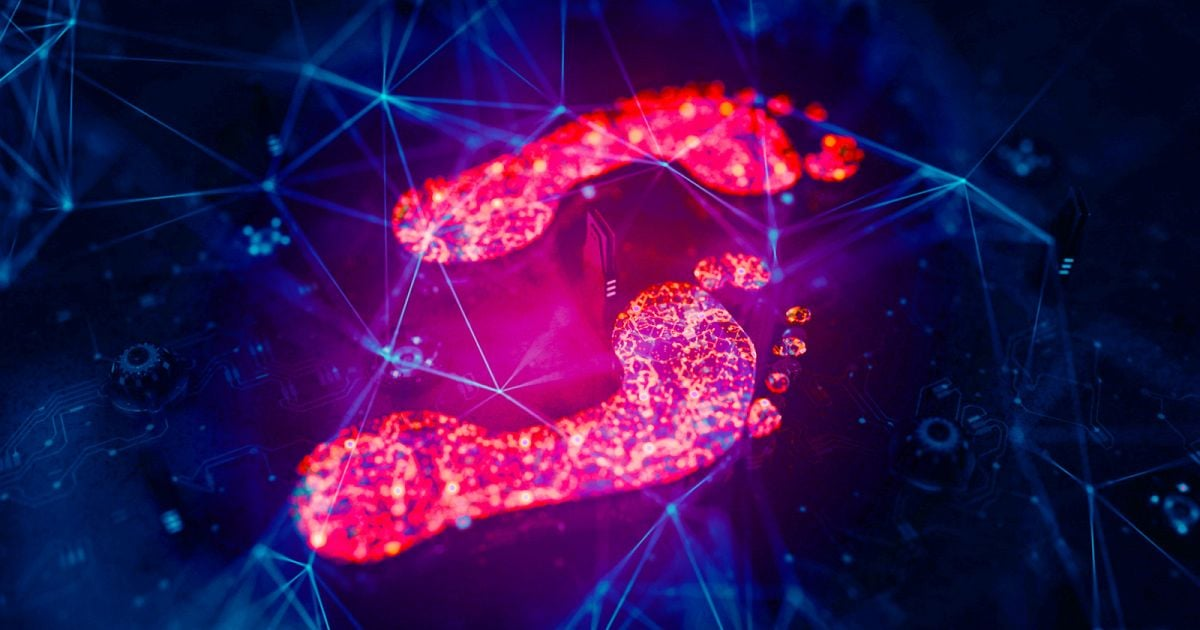

In [ ]:
Image('footprint-tracking-cybersecurity-digital-footprint.jpg' , height = 700 , width = 2000)

<h2 style="color:darkolivegreen;"><center><u>[Chapter 2: Pre-processing Images and Image Detection Techniques]</u></center></h2>

<p><center>Gathering images is a important task in data forensics and what we can gain from these images is up to us to interpret any patterns, identifying any correlation and gives us a snap shot view of a case. In this scenario we have identified a footprint which pops up a bunch of questions like what can we use to analyze to the identiy of the indvidual to start off we can ask what is this individual's shoe size, is there any id we can observe, any way we can tell the gender of the individual and if there are any other pictures is there any correlation. Digital forensic investigators must be wary about this as it can solve many future cases there with patterns as identifying if the same footprint belongs to someone and how we can use this in a crime scence case of a series of murders.https://ksltv.com/416930/digital-footprint-led-police-to-suspect-in-lueck-murder/

In this case this image footprint is a women who wears asics S465N with a size of 7.5.

In [5]:
from google.colab import files
from IPython.display import Image, display

uploaded = files.upload()





Saving 001_01_L_01.jpg to 001_01_L_01.jpg


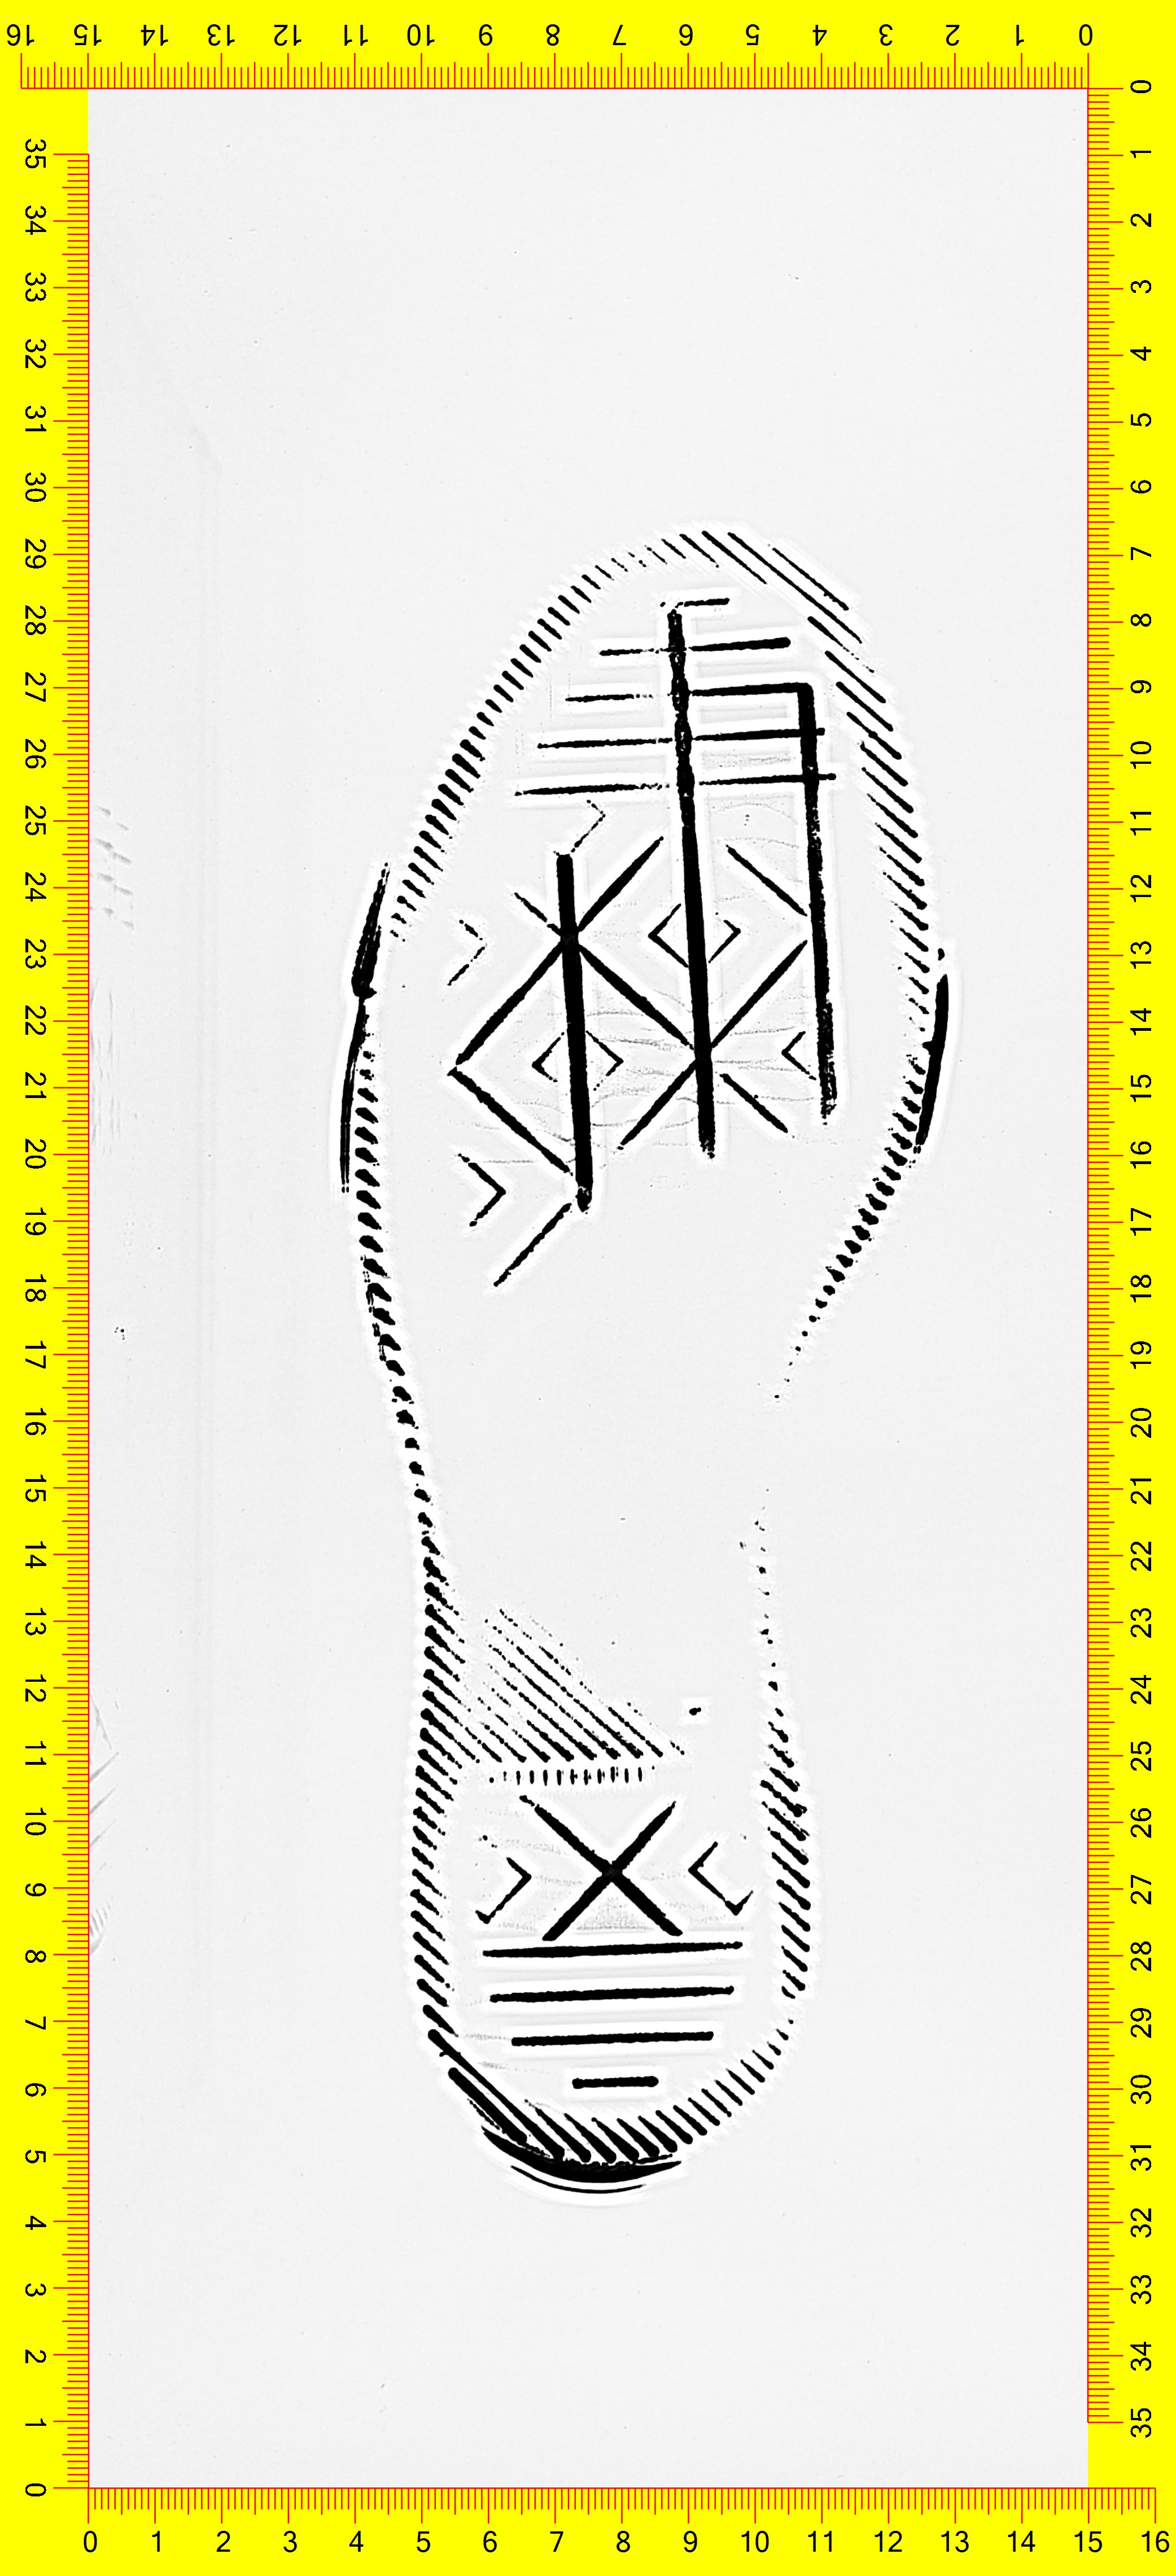

In [ ]:
Image('001_01_L_01.jpg' , width = 500 , height = 400 )
Image('001_01_L_02.jpg', width = 500, height = 400)

<h4 style="color:darkolivegreen;"><center>[Adding Multiple images at the same time into google collab by having subplots]</center></h4>

<h4 style="color:darkolivegreen;"><center>[Canny Algorithm Denoising and Manipulating images by edge detection]</center></h4>

<p><center>The canny algorithm a famous algorithm by John F Canny from 1986 meant to sketch the edges of a object present in a picture.</center></p> 

<blockquote style="color:cadetblue";> The Canny algorithm is a multi process algorithm and the steps below are essential to sucessfully process the image with the canny algorithm denoted by the picture below and code snippet.</blockquote>
<ol style="textalign:center; list-style-position:inside";>
<li> Noise reduction</li>
<li> Gradient calculation</li>
<li>Non-maximum suppression</li>
<li> Double threshold</li>
<li>Edge Tracking by Hysteresis</li>
</ol>

<p><center>Looking at our code snippet, we imported our libraries. The perk of downloading CV2, it that is has the canny algorithm built in, so we can iterate through the image based on its number of features. We first need to read and resize our image with by our matplot lib library.</center></p>
<blockquote style="color:cadetblue";>The canny function has 3 arguments which our first argument is our resized image to fit the scale in matplotlib, 2nd argument is our minVal of our features to our maxVal in arguments</blockquote>

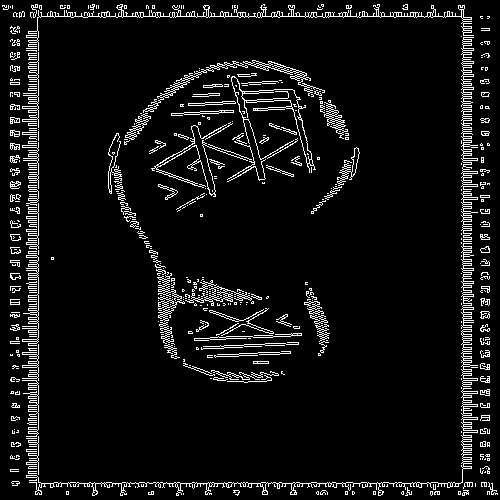

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import PIL



image = cv2.imread("001_01_L_01.jpg", 1)

# resize our images for a dimension

image_resized = cv2.resize(image,(500,500))



# Make our image recognizable by a feature like the discernable edges of the footwear image

edges = cv2.Canny(image_resized,300,400)

cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

<p><center> Now that you have seen the code try adding your own set of edges and play around</center></p>

In [ ]:
#TODO Add a new set of edges descriptors using a resized image to fit into google collab changing the snippet edges = cv2.canny(image,minVal,maxVal)


<h4 style="color:darkolivegreen;"><center>[SIFT Scale Invariant Feature Transform]</center></h4>
<p><center>The SIFT algorithm will help with finding with the image processing in extracting an images keypoints and computing its necessary descriptors.</center></p>
<blockquote style="color:darkkhaki";>The sift algorithm is a very easy-to-use feature extraction technique that gets rid of a lot of redudant features. As the name suggests, SIFT finds these keypoints of an image, that are scale and rotation invariant, for our image processing.</blockquote>

<p><center>Link to the first proposal of this algorithm: <a href=
"https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf">[LINK]</a></center></p>


<p><center>There are four necessary points D.Lowe goes over in this algorithm</center></p>

<ol style=text-align:center;list-style-position:inside">
<li>Scale Space Extrema Detection : Make sure the features are scale independent this is utilized by different of gaussian function</li>

<li> Keypoint Localization : Need to indentify any sustainable features or keypoints need to address there location and size</li>

<li>Orientation Assignment : Need to ensure our keypoints are rotation invariant that they make sense in respect to there size a 500x500 pixel image might be representative of 2000 features lets say but</li>

<li>Keypoint Descriptor : Unique print into their keypoints and they transfomred into a representation from a keypoint level of significant points distortions</li>
</ol>




<h4 style="color:darkolivegreen;"><center>[One Image Footprint 1 with default descriptors from the SIFT algorithm]</center></h4> 

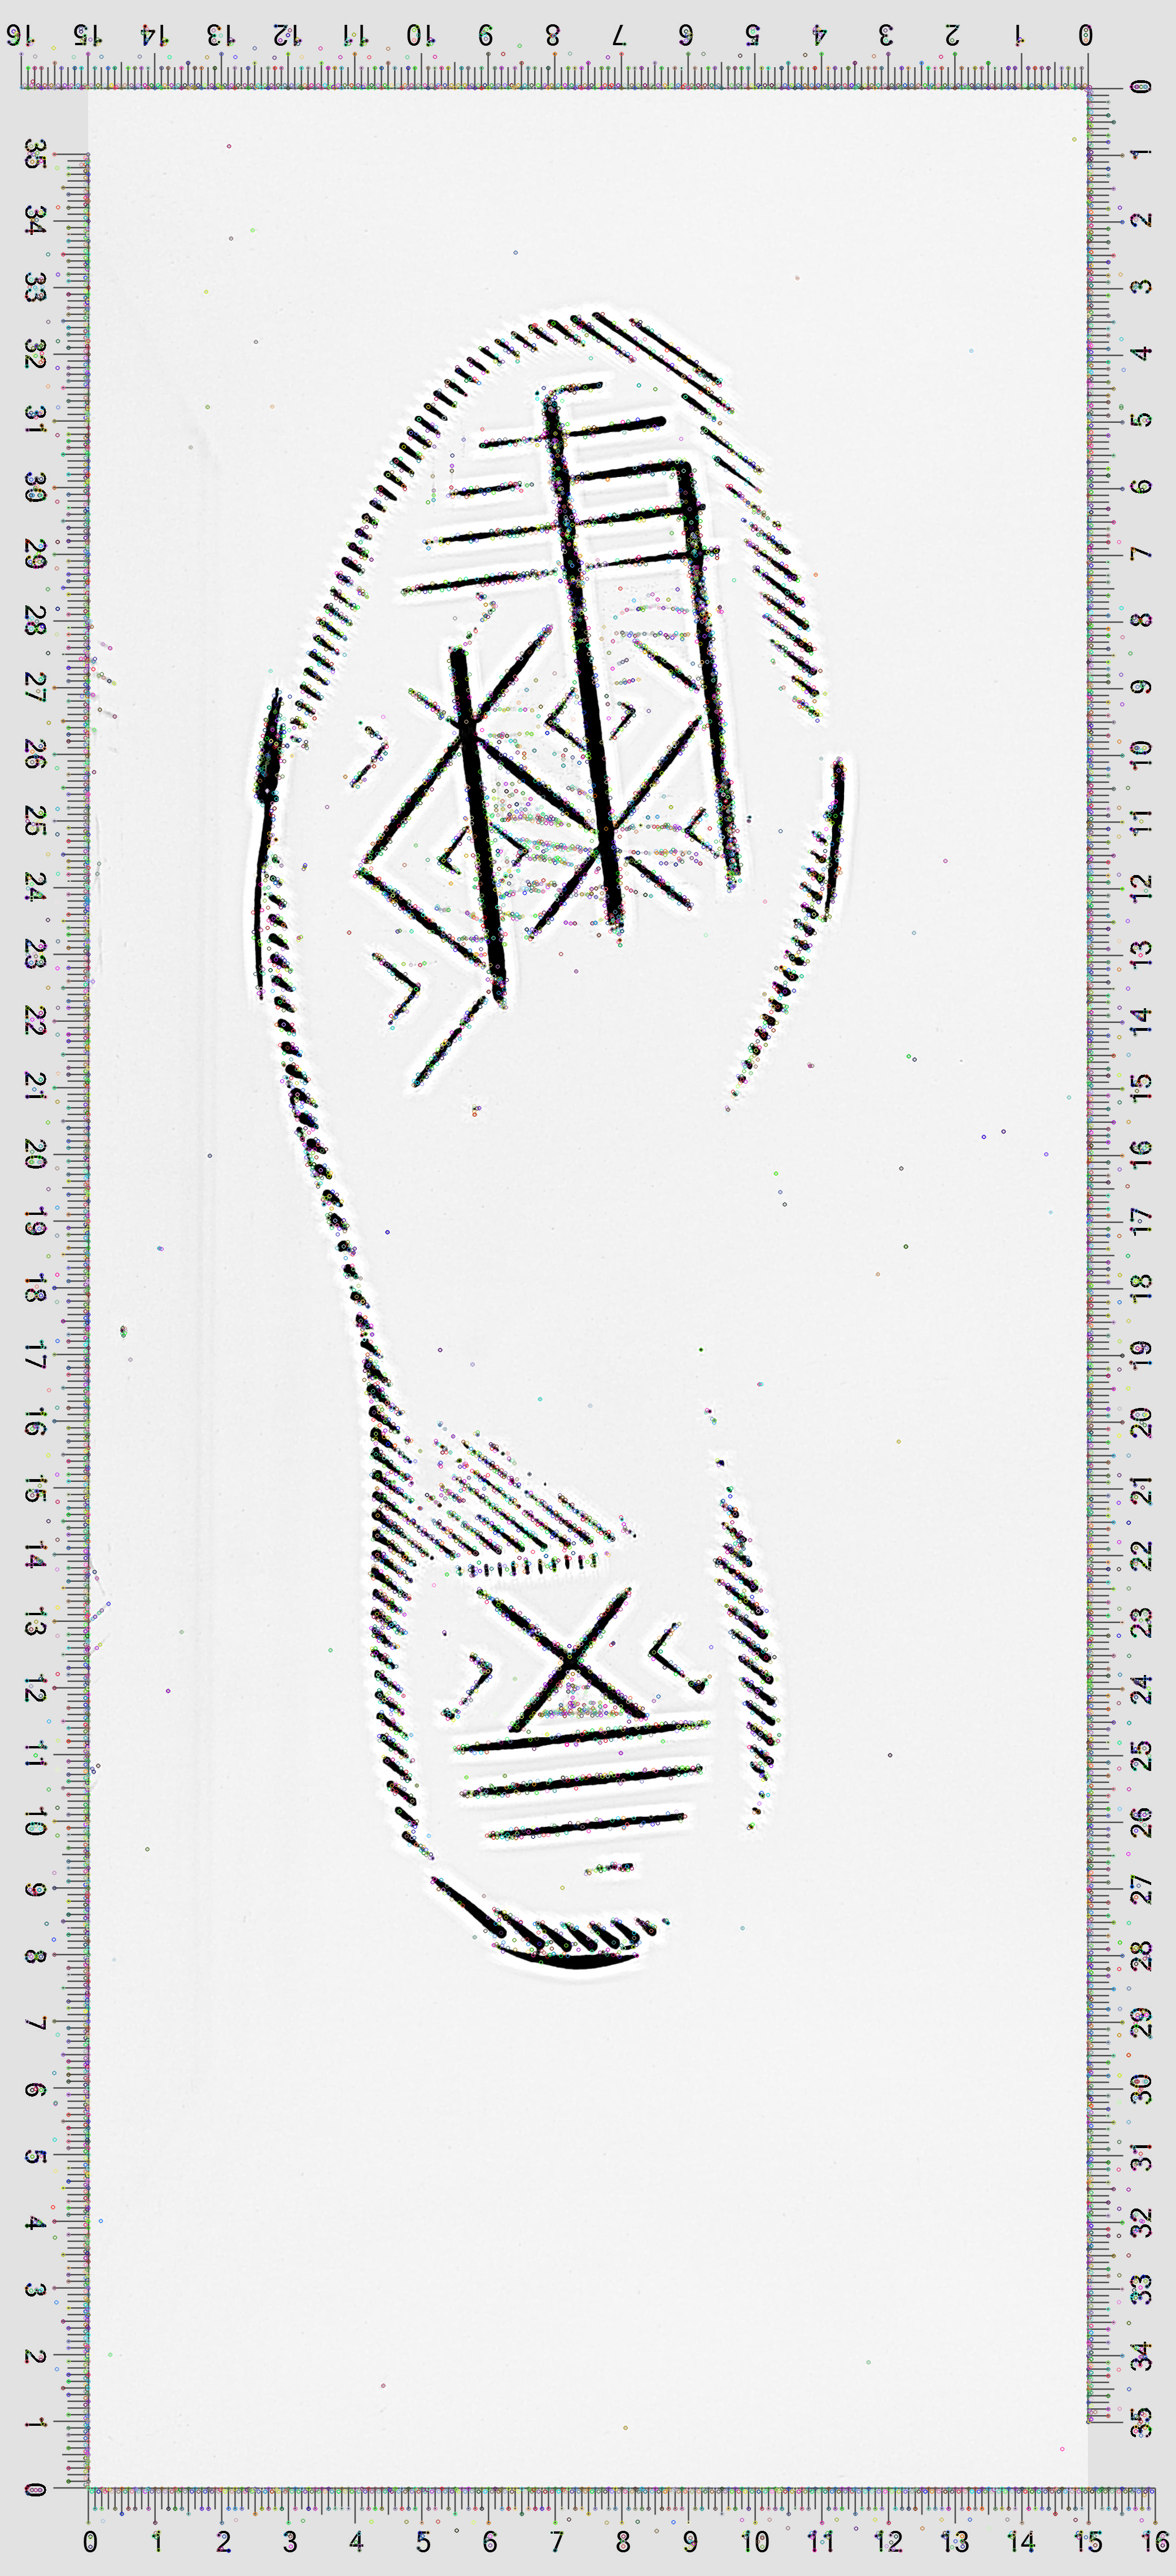

In [6]:
# import required libraries
import cv2
from google.colab.patches import cv2_imshow
# read input image
img = cv2.imread('001_01_L_01.jpg', cv2.IMREAD_GRAYSCALE)


# Initiating a SIFT object with default values
sift = cv2.SIFT_create()

# find the keypoints on image (grayscale)
kp = sift.detect(img,None)


# draw keypoints in image
img = cv2.drawKeypoints(img,kp, None, flags=0)   


# display the image with keypoints drawn on it
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<p><center><b>Look at that it detects any edge or contour of our image then lets get into how we can have two images and correlate the matches or keypoints between them in the next part!</b></center></p>

<p><center>One Image Footprint 1 with default descriptors from the SIFT algorithm</center></p>
<br>
<h4 style="color:darkolivegreen;"><center>[TODO Implement this algorithm with your own set of features]</center></h4> 

In [ ]:
#TODO Implement your code here with a footprint image given by the image footprintset
# import cv2_imread() etc utilize the features

<h4 style="color:darkolivegreen;"><center>[Countour Challenge Algorithm]</center></h4> 

<p><center>Countour detection is one of the forefronts for early image processing</center></p>

<h4 style="color:darkolivegreen;"><center>[Cross-correlation of two footprints(WIP) need more info]</center></h4> 

<p><center>In order for us to cross-correlation images together we have to follow some steps:</center></p>

<ul style=text-align:center;list-style-position:inside">
<li>Load our image footprints and extract their pixel by pixel data</li>
<li>Normalizing our images and downsample* the images</li>
<li>Calculate cross corelation using our matrixed pixel information</li>
<li>Then highlight our areas of image overlap</li>
</ul>



<blockquote style="color:darkkhaki";>*downsample - compressing an image's resolution down.</blockquote>

In [ ]:
#import cv2

# Creating a kernel to iterate from in convultion process
##kernel = np.ones((5,5)np.float32)/25






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2 style="color:indigo;"><center><u>[Chapter 3: Digital Image Steganography]</u></center></h2>

In [ ]:
uploaded = files.upload()



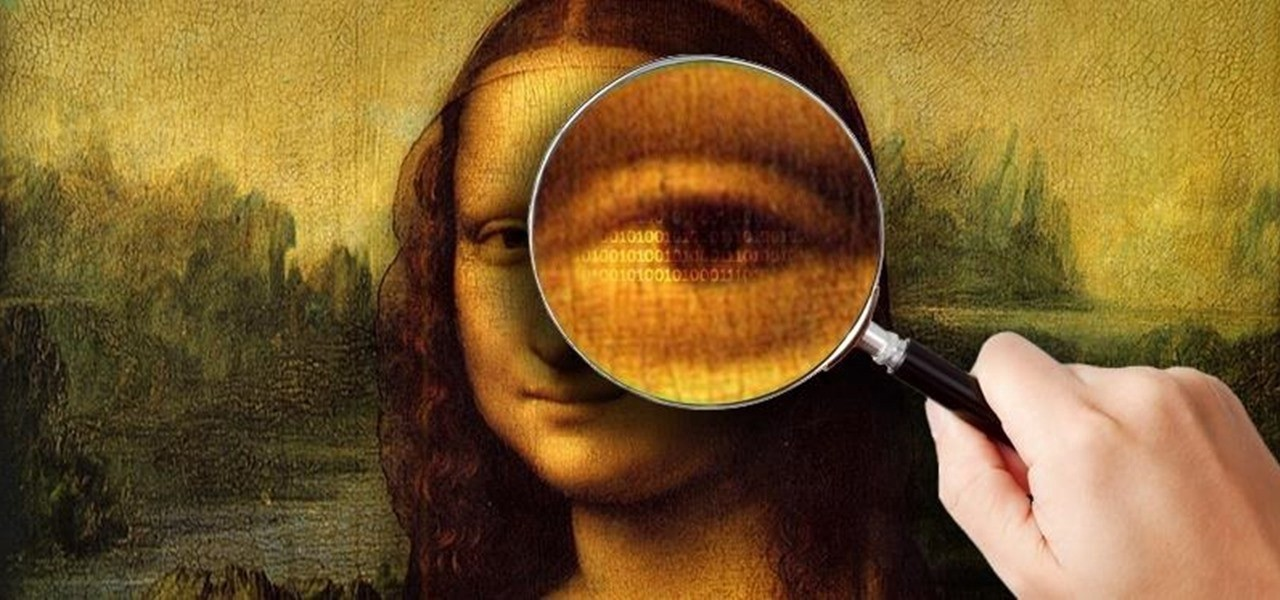

In [ ]:
Image('steganography mona lisa.jpeg', width = 1000 , height = 600)


<p><center>In order to explore the the mind of a criminal, digital forensic scientists are often tasked with employing anti forensic-techniques to simulate criminal activity. One technique that we will be exploring is Steganography.</center></p>

<p><center><b>Steganography</b> is the process of hiding or concealing data in either text, image or video formats. Think of it like as a method of creating and sneaking in a secret message, as if you were using an invisible ink pen.</center></p>

<blockquote style="color:mediumpurple";>Steganography is a vast field and there are plenty of ways to go about adding some sort of message onto a innocent looking image.</blockquote>

<p><center>We will be exploring one Steganography method which is called <b>least significant bit steganography</b>. Which is a simple and easy to implementation technique that will change the least significant bit of an image - creating some small alteration of an embedded image.</p></center>

<blockquote style="color:mediumpurple";>We will demonstrate this by an example of changing the bitmap index in one of our footprint images and giving you the run down analysis on how to decrypt an image of this sort as well.</blockquote>



<p><center><a href="https://www.nbcnews.com/id/wbna38028696">[Story premise]</a></center></p>



<h4 style="color:indigo;"><center><u>[Step 1: Accessing Indvidual Bits or Pixels in a image]</u></center></h4>

<p><center>We need to do some basic image manipulation. One of the first and most simplest steps we can do for steganography is first finding the individual bits in a image.</center></p>
<blockquote style="color:mediumpurple";> Any pixel we have in a numpy matrix is in the format of matrix[r,c] r being the row number and c being the columnn this needs to be fixed</blockquote>


TypeError: ignored

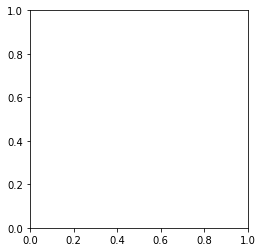

In [ ]:
#from matplotlib import pyplot as plt
#sten_img = cv2.imread('001_001_L_01.jpg', 0)

#plt.imshow(sten_img, cmap= 'gray')
#print(sten_img)

<h2 style="color:indigo;"><center><u>[Chapter 4: K-Means Clustering for Image processing</u></center></h2>

<p><center> K-means algorithm’s goal is to group similar data points together into a predefined number of clusters. You can determine data points are similar by looking at how far apart they are. If two data points are closer, you can tell they are similar and if two data points are farther apart then it’s less similar. Once the distance between each data point  and a centroid is calculated you assign it to a cluster..K-means involves centroids and makes use of them. Centroids means the cluster center. The number of centroids that are made correspond to the number of clusters that will be made.</center></p>
<blockquote style="cadetblue"> Centroid is a representation of the cluster's center.</blockquote>




<p><center> Now lets test out this unsupervised model by applying it to one of our images look with using a centroid k means of something like 3 so we will have 3 clusters </center></p>


<blockquote style="cadetblue"> Lets use our trusty image processing libraries like cv2 with our detailed input parameters </blockquote>

<dl style="text-align:center;list-style-position:inside">
    <dt><a href="https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html">[K-means cv2]</a></dt>


<blockquote style="cadetblue"> <dd style="color:cadetblue;">
</dd>   </blockquote>



<p><center>Next step include something interactive like a quiz implementation with JavaScript.</center></p>
<p><center>One of the sample questions could be like - what is the 5 step process in the canny algorithm etc</center></p>

In [16]:
uploaded = files.upload()

Saving 001_01_L_02.jpg to 001_01_L_02.jpg


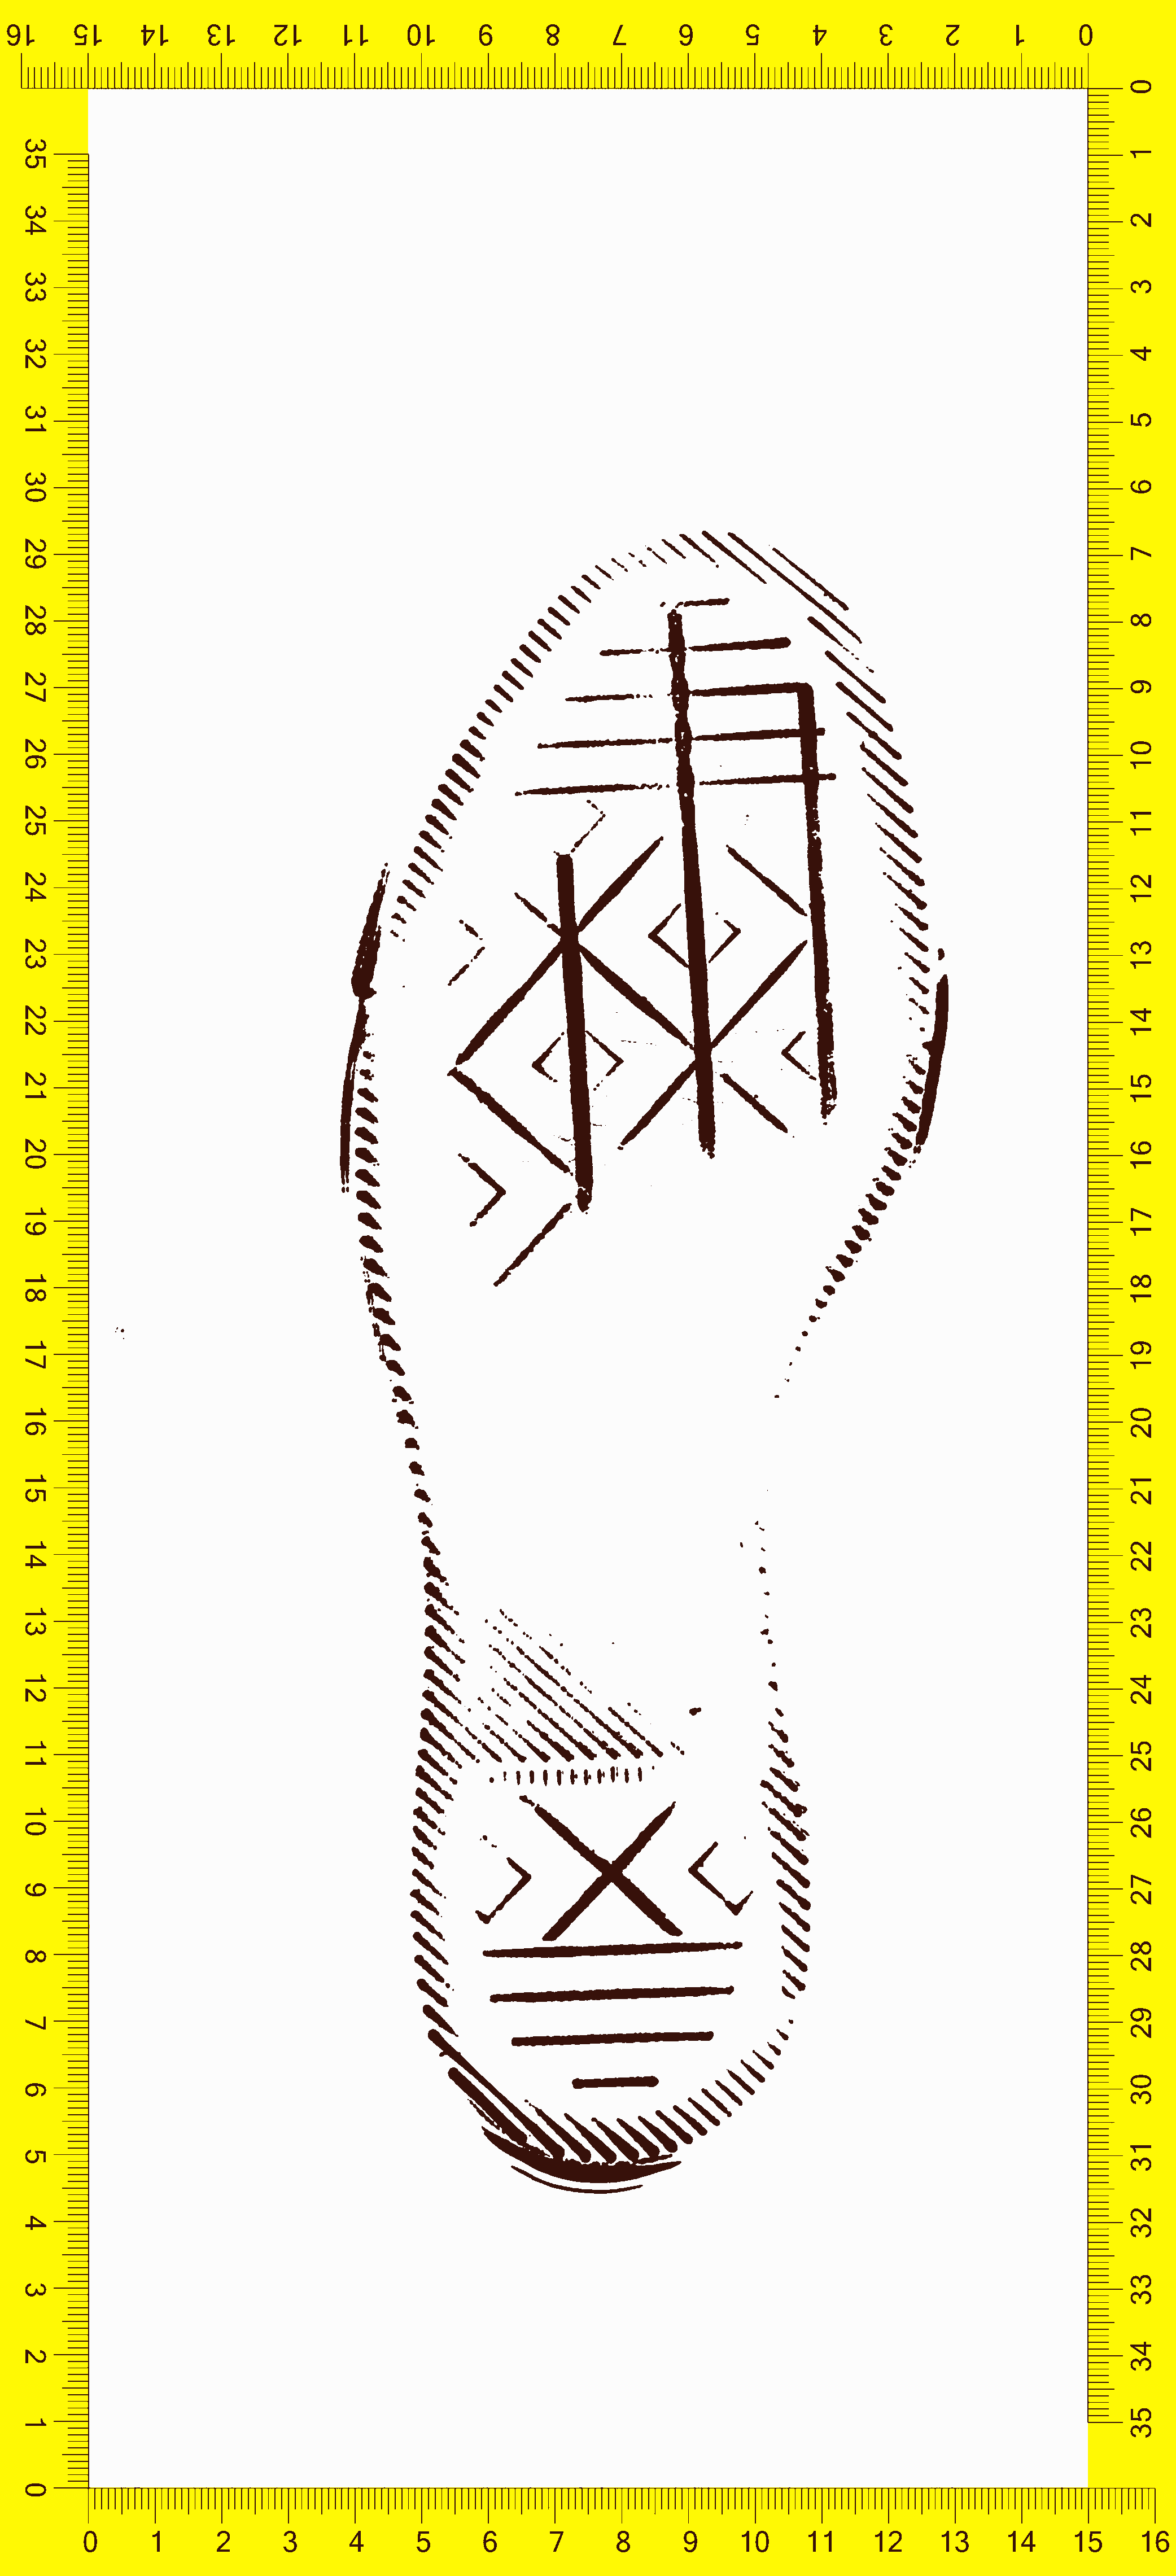

In [21]:
import numpy as np

import cv2

img = cv2.imread("001_01_L_02.jpg", 1)

#reshaping our images to be a different size array to enable k-means algorithm

image2 = img.reshape((-1,3))

image2 = np.float32(image2)

# define  our criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# our k-clusters that consist of 3 
K = 3

#the number of times the code will iterate to make our clusters with each initial label have more compactedness
runs = 10
ret,label,center=cv2.kmeans(image2,K,None,criteria,runs,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2_imshow(res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h2 style="color:darkcyan;"><center><u>[Algorithms for image processing]</u></center></h2>

<p><center>An API is mainly used for interacting with the database through different HTTP requests, such as HTTP GET, HTTP POST, HTTP delete and HTTP update.</center></p>
<blockquote style="color:cadetblue";> In the case of processing images, APIs are very helpful, and they have a very important role for storing a tremendous number of images that need to be processed later through an algorithm such as segmentation, geometric transformations and K-means Algorithms.</blockquote>
 
<p><center>First, the segmentation algorithm is used for splitting an image into multiple layers by separating each layer so that it can be simplified for a better analysis</center></p>
 
<p><center>Second, geometric transformations are used for positioning and replacing shapes which sometimes helps in segmentation algorithms to provide a better analysis.</center></p>
 
